# MuTrans Analaysis of IPS Reprogramming Dataset

## Load the Processed Data and Explore with Scanpy

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(3, 3), facecolor='white')
import matplotlib.pyplot as plt
import pyMuTrans as pm

datadir = "../Data/"
adata = sc.read(datadir+'ipsc.h5ad')

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


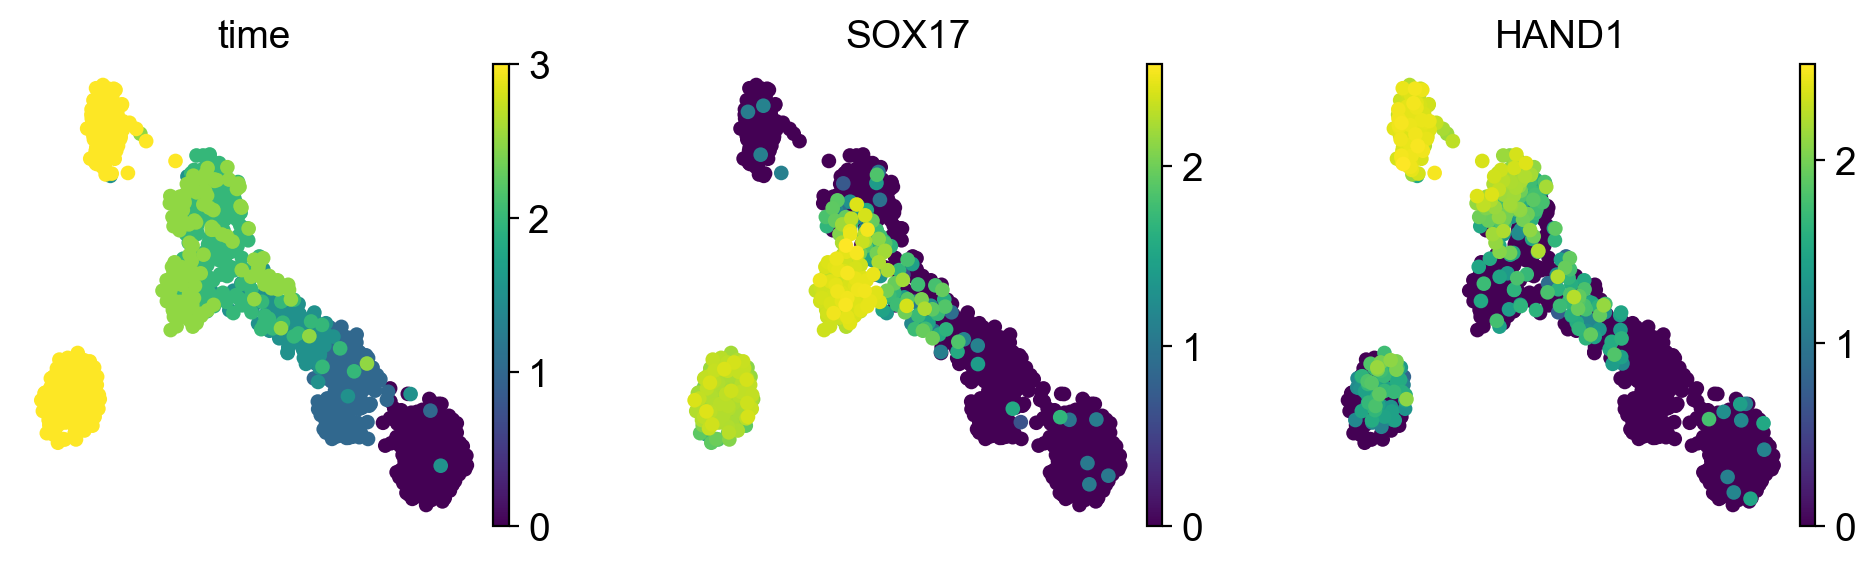

In [2]:
sc.pp.neighbors(adata,metric = 'cosine',n_neighbors=60, use_rep='X')
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['time','SOX17','HAND1'])

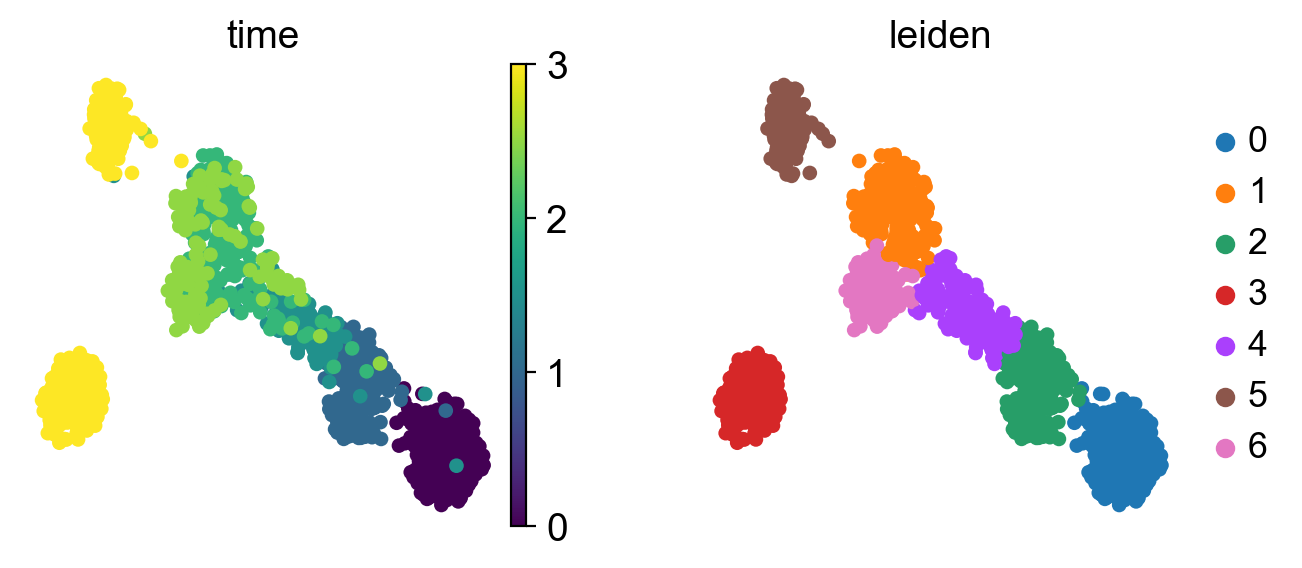

In [5]:
sc.tl.leiden(adata,resolution = 1.0)
sc.pl.umap(adata, color=['time','leiden'])

## MuTrans Analysis Based on the AnnData Object

The [matlab API for python](https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html) is required to install for the analysis below.

In [7]:
par = {"choice_distance":"cosine","perplex":200.0,"K_cluster":9.0,"trials":10,"reduction_coord":'umap',"weight_scale":False,"write_anndata":True} 
adata = pm.dynamical_analysis(adata,par)

... storing 'attractor' as categorical


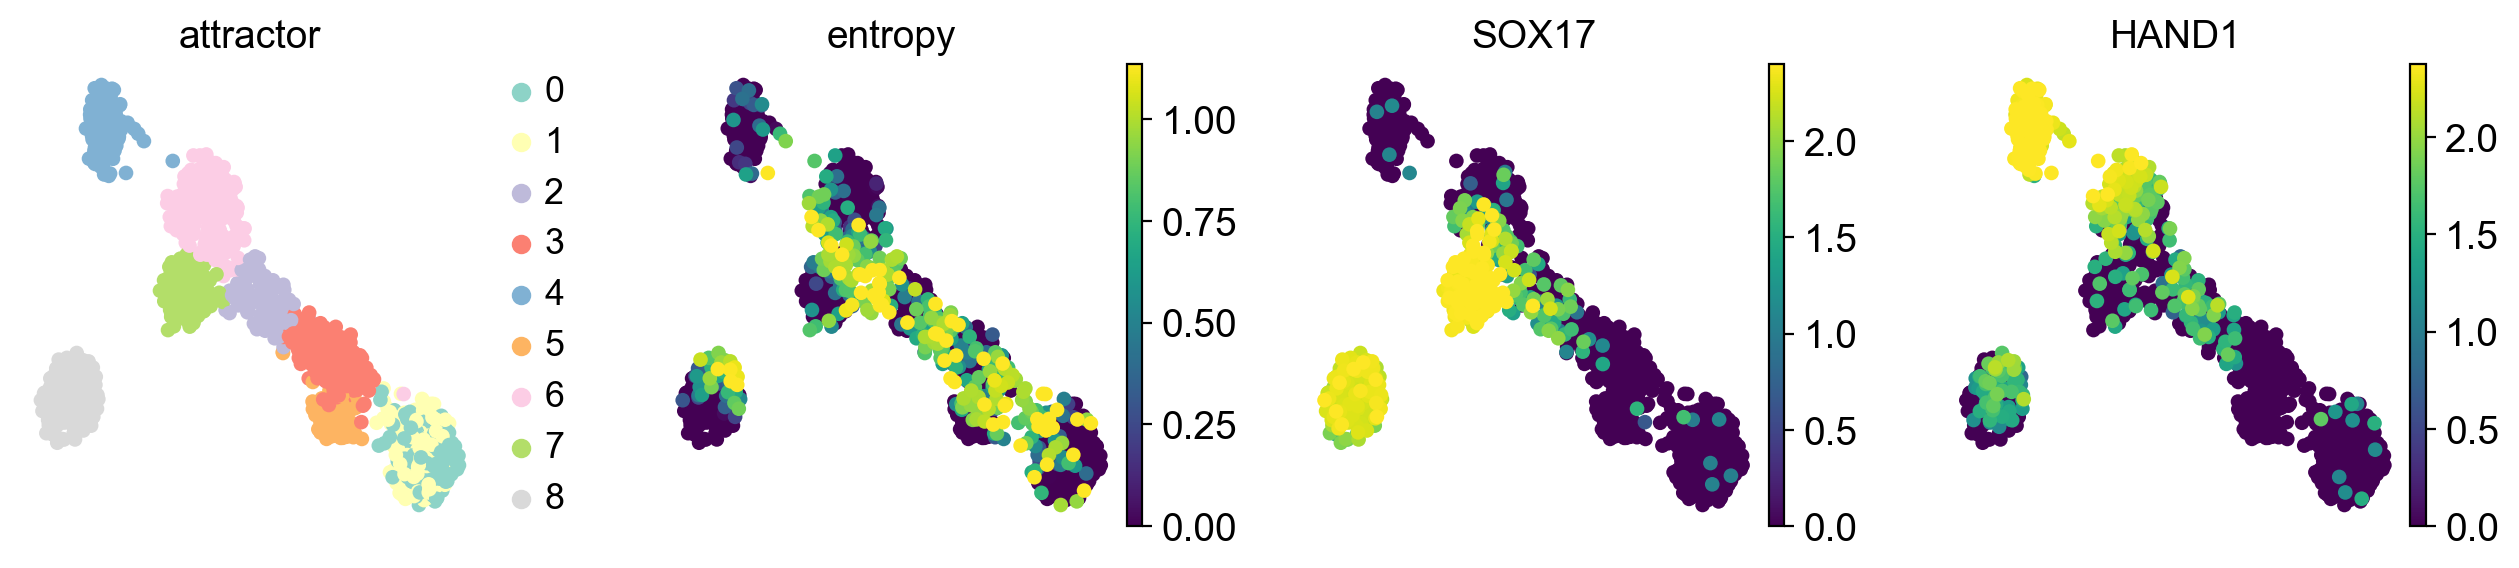

In [8]:
import seaborn as sns
color_palette = sns.color_palette('Set3', 9)
temp = color_palette [6]
color_palette[6] = color_palette[7] # for reproduce the order in Matlab notebook
color_palette[7] = temp
sc.pl.umap(adata, color=['attractor','entropy','SOX17','HAND1'],vmax = 'p95',palette = color_palette)

## Examine the Entropy of Transition Cells

... storing 'time' as categorical
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


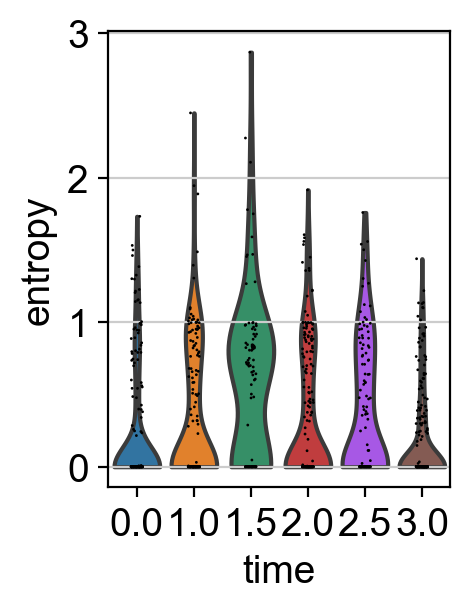

In [10]:
adata.obs['time'] = adata.obs['time'].astype(str)
sc.pl.violin(adata, keys = ['entropy'], groupby='time')

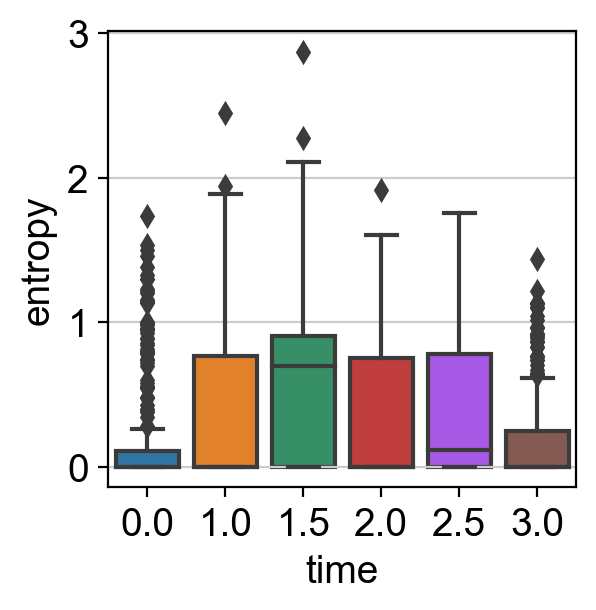

In [11]:
ax = sns.boxplot(x="time", y="entropy", data=adata.obs)

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


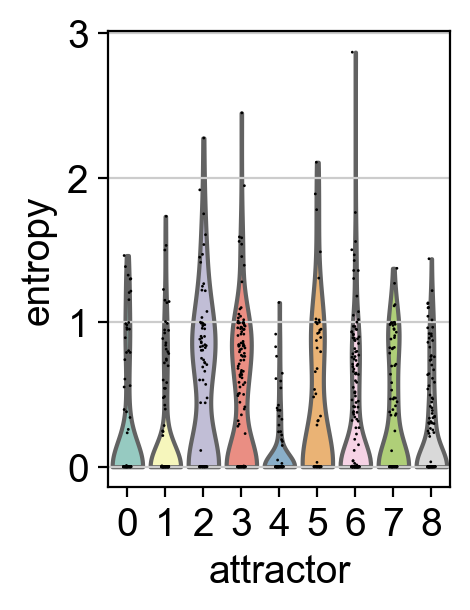

In [12]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor',palette = color_palette)

## Transition Path Analysis

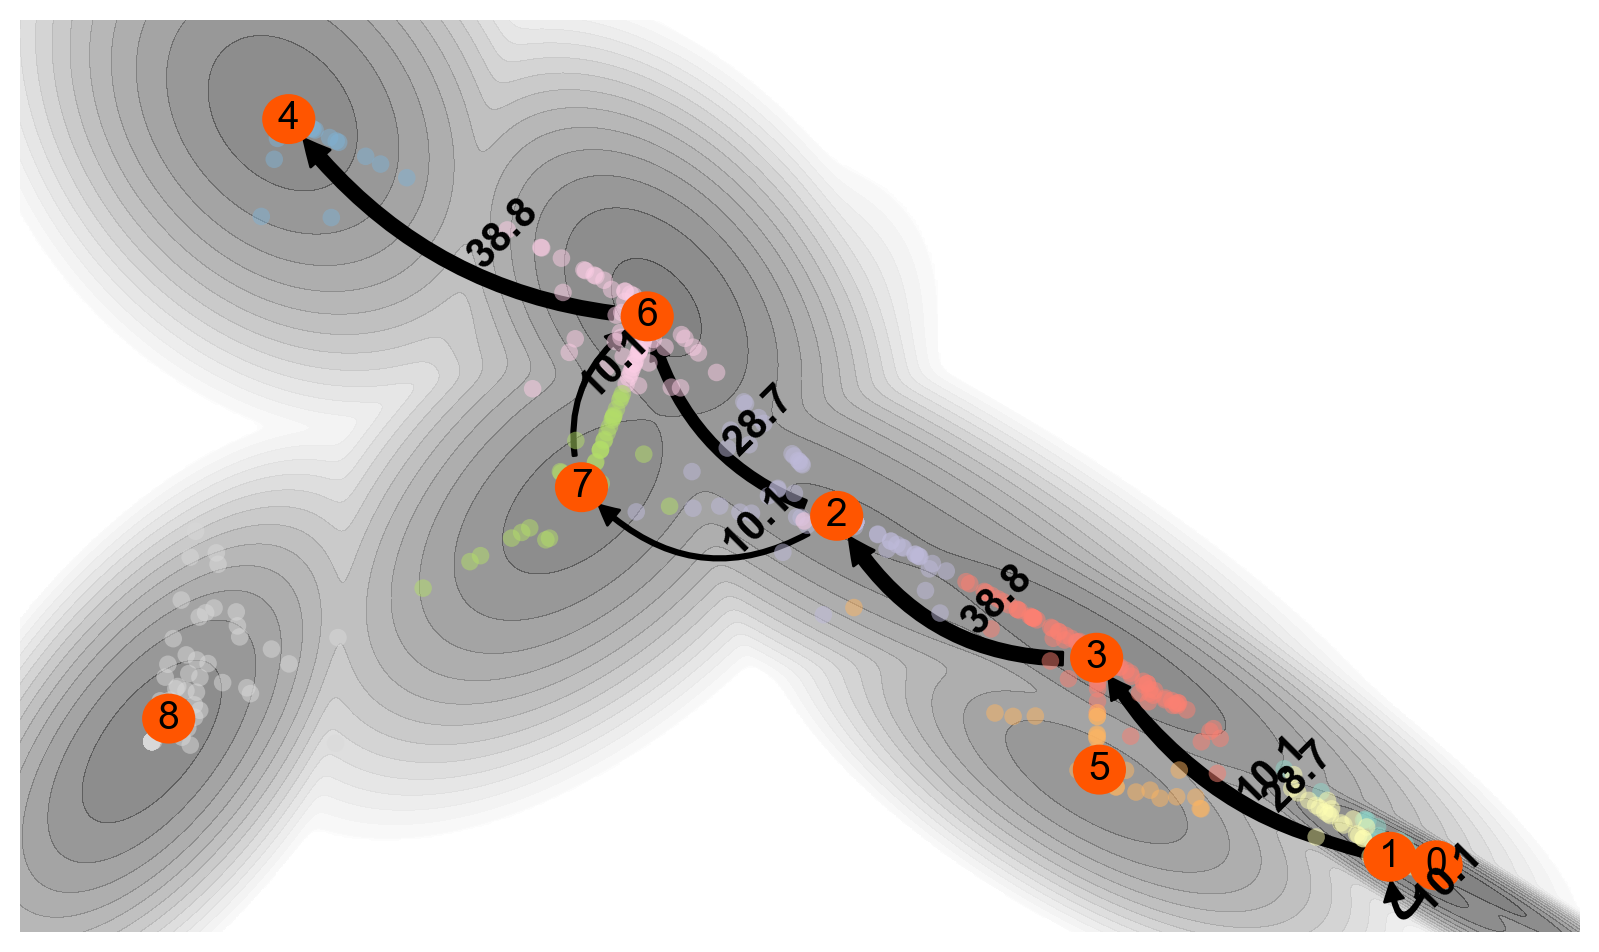

In [13]:
fig = plt.figure(figsize=(10, 6))
pm.infer_lineage(adata,si=0,sf=4,method = "MPPT",flux_fraction = 0.3,size_point =40,alpha_point = 0.5,size_text = 15,color_palette=color_palette)

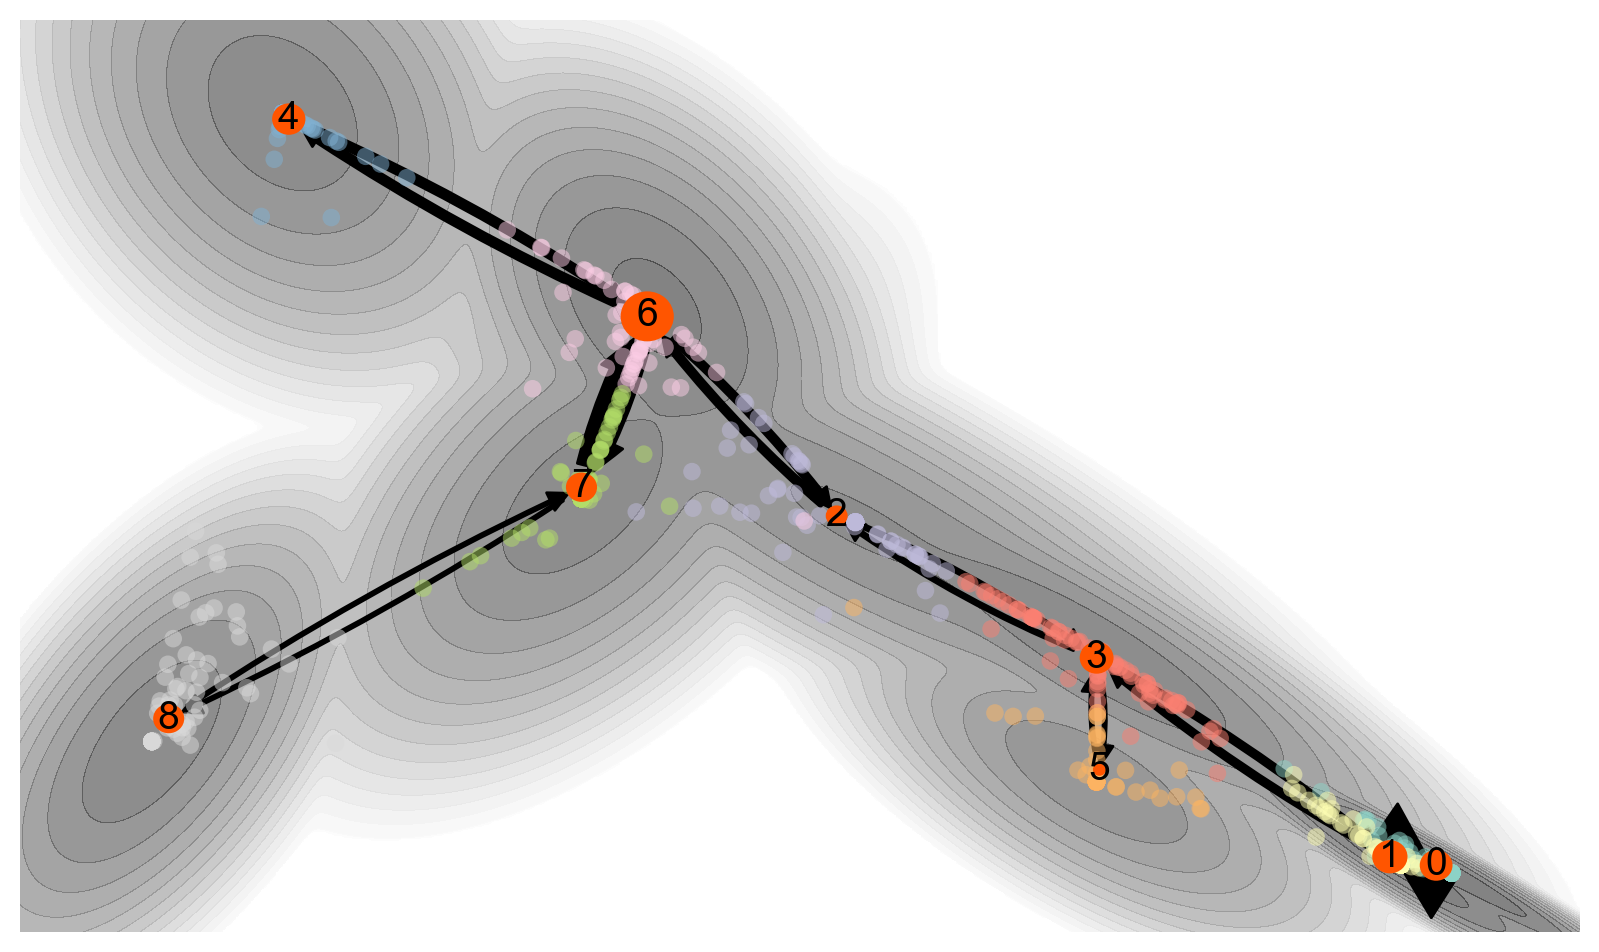

In [14]:
fig = plt.figure(figsize=(10, 6))
pm.infer_lineage(adata,method = "MPFT",flux_fraction = 0.3,size_point =40,alpha_point = 0.5,size_text = 15,color_palette=color_palette)

## Visualization of Gene Analysis Results

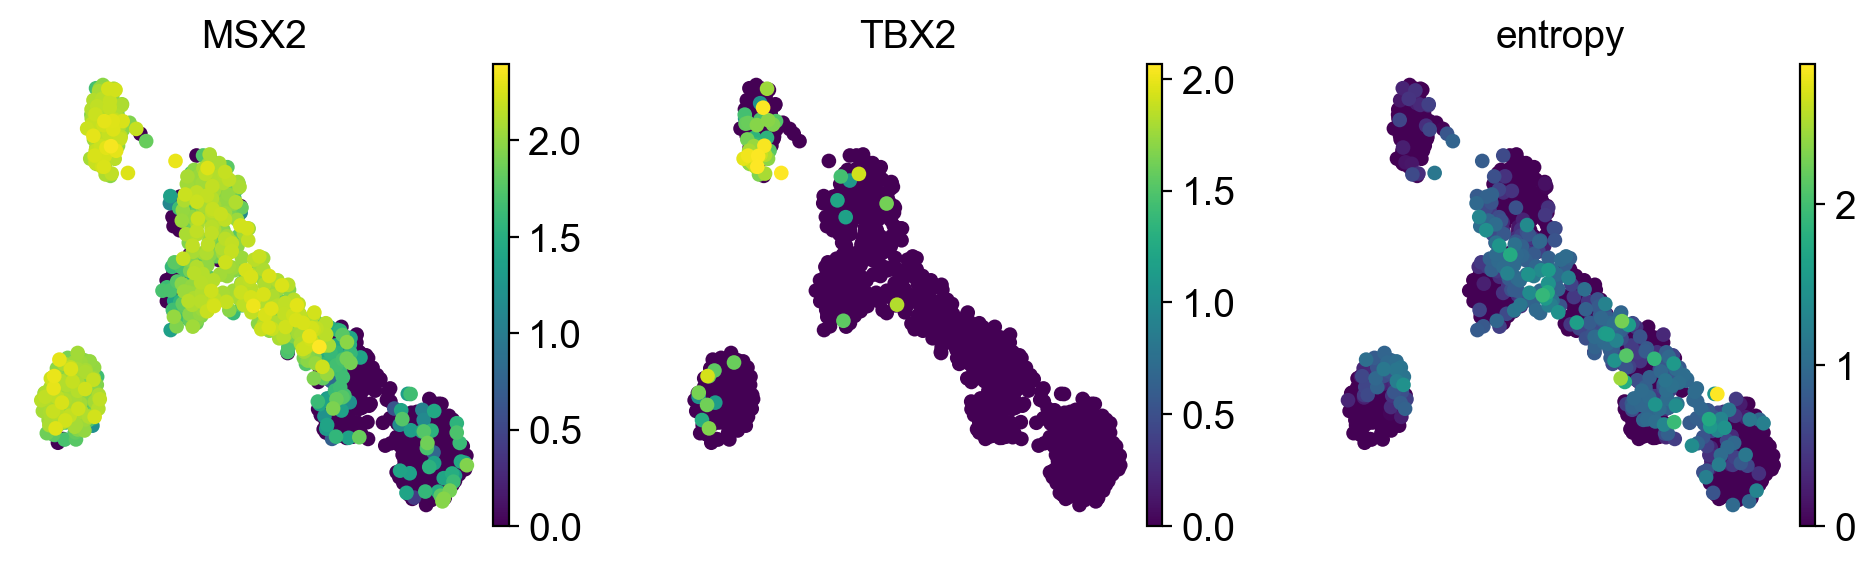

In [15]:
sc.pl.umap(adata, color=['MSX2','TBX2','entropy'])

In [16]:
adata_sub = adata[adata.obs['attractor'].isin(['6', '4']),:]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [17]:
adata_sub

View of AnnData object with n_obs × n_vars = 302 × 96
    obs: 'time', 'leiden', 'land', 'entropy', 'attractor'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_colors', 'da_out', 'land', 'attractor_colors', 'time_colors'
    obsm: 'X_umap', 'trans_coord', 'membership'
    obsp: 'distances', 'connectivities'

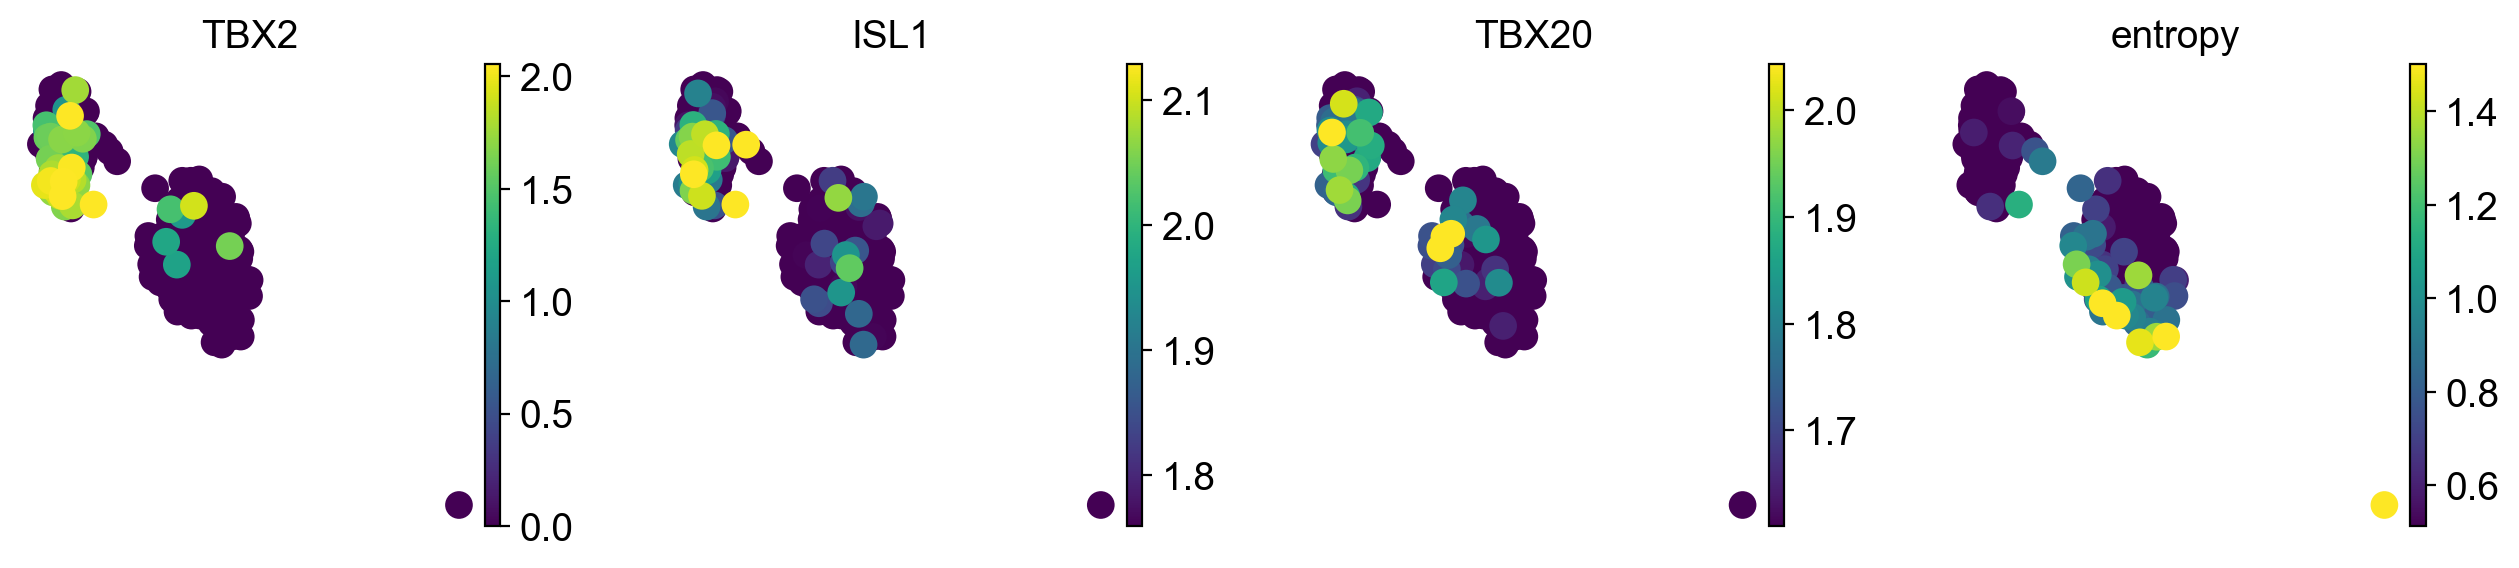

In [18]:
sc.pl.umap(adata_sub, color=['TBX2','ISL1','TBX20','entropy'],vmin = 'p80',vmax = 'p99')

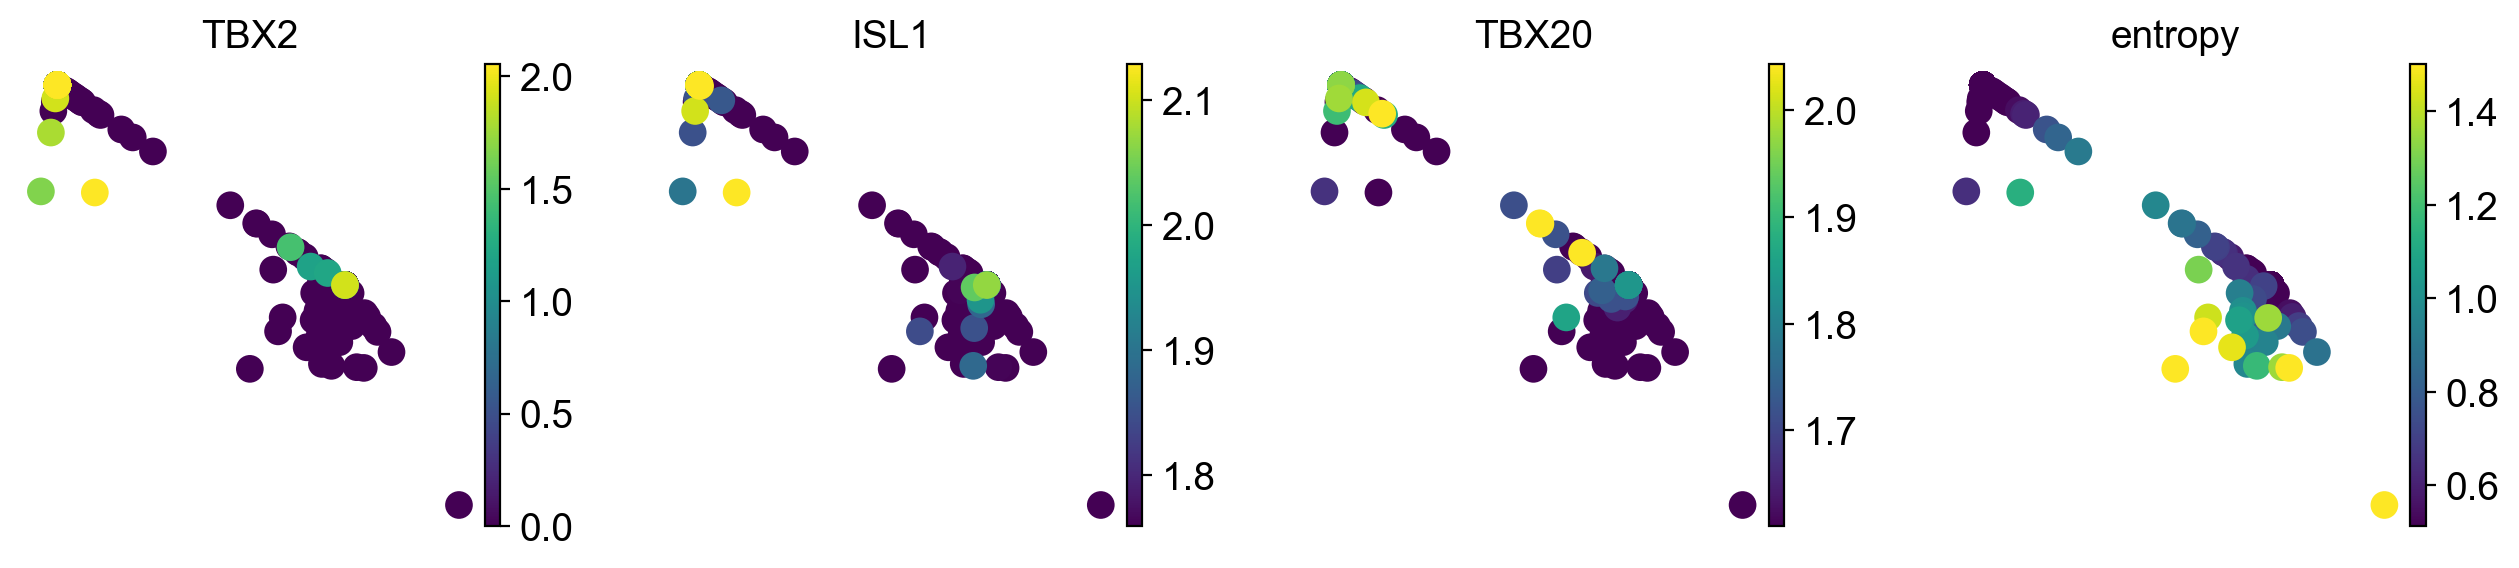

In [19]:
sc.pl.embedding(adata_sub, color=['TBX2','ISL1','TBX20','entropy'],vmin = 'p80',vmax = 'p99',basis = 'trans_coord')

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

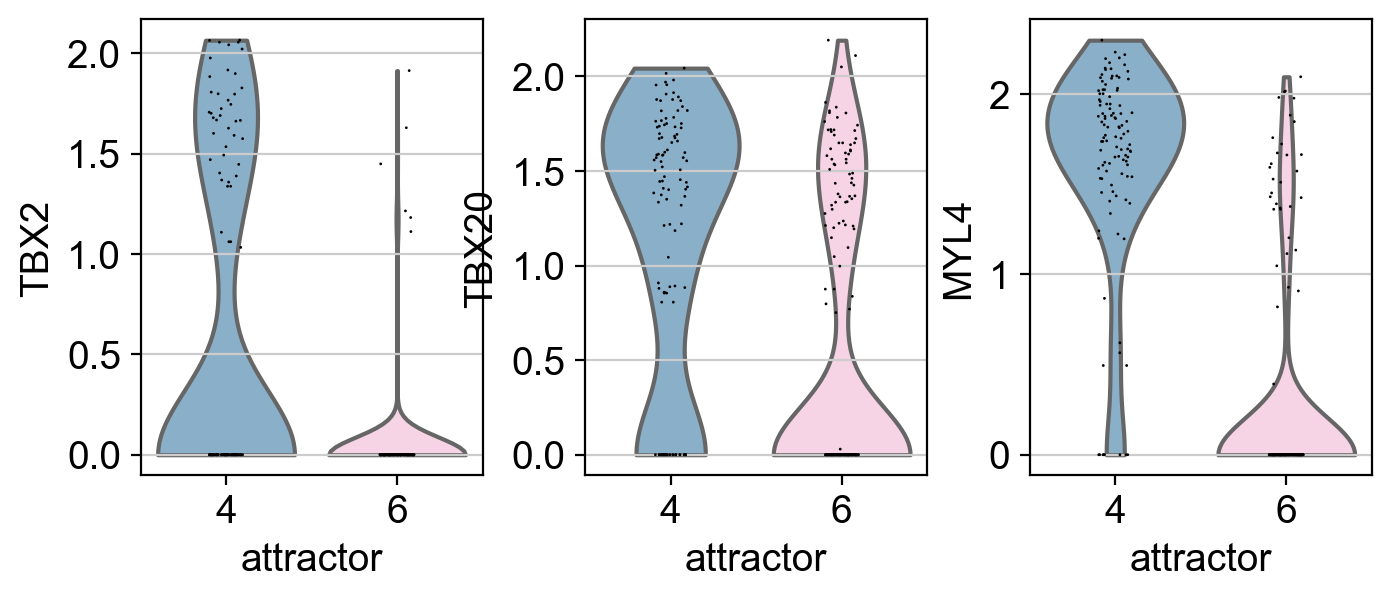

In [20]:
sc.pl.violin(adata_sub, keys = ['TBX2','TBX20','MYL4'], groupby='attractor',palette = [color_palette[4],color_palette[6]])

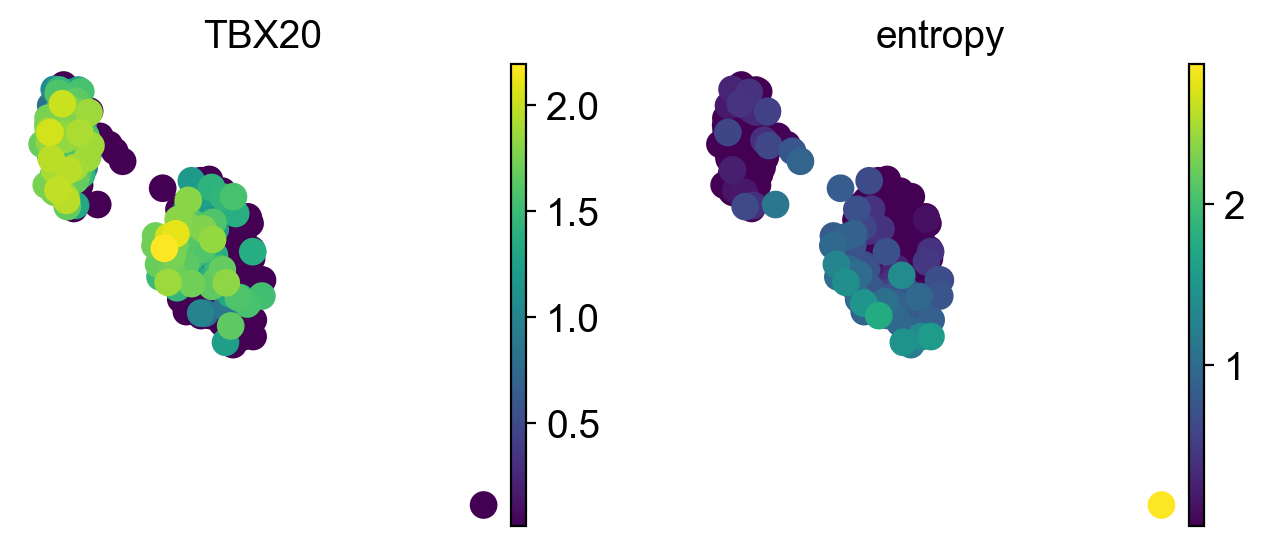

In [21]:
sc.pl.umap(adata_sub, color=['TBX20','entropy'],vmin = 'p50')

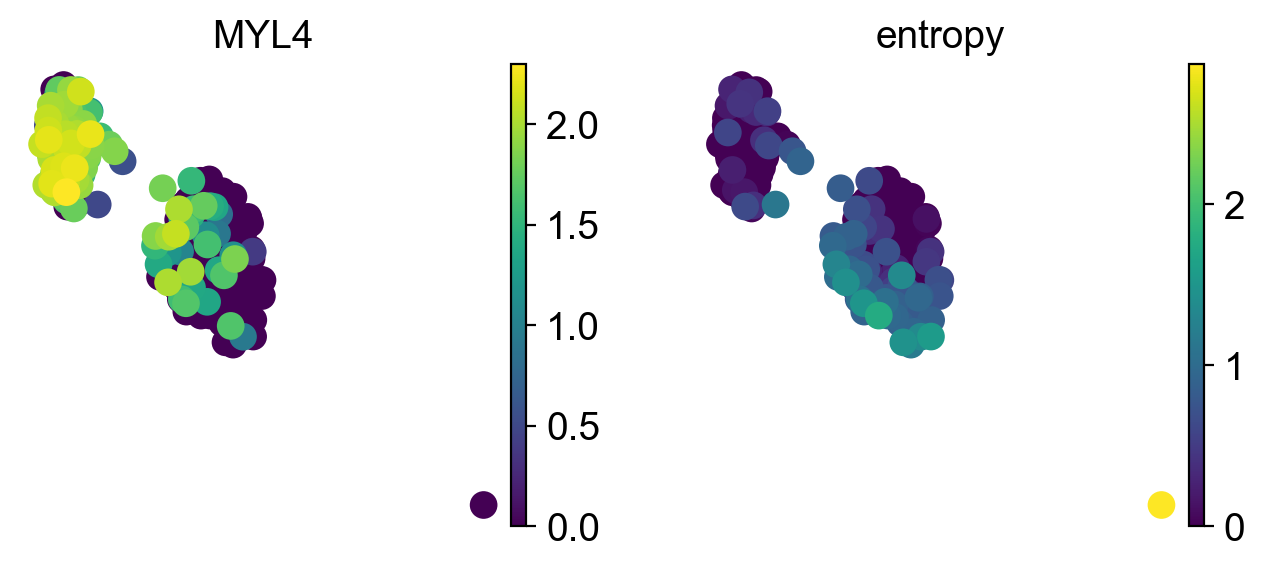

In [22]:
sc.pl.umap(adata_sub, color=['MYL4','entropy'])

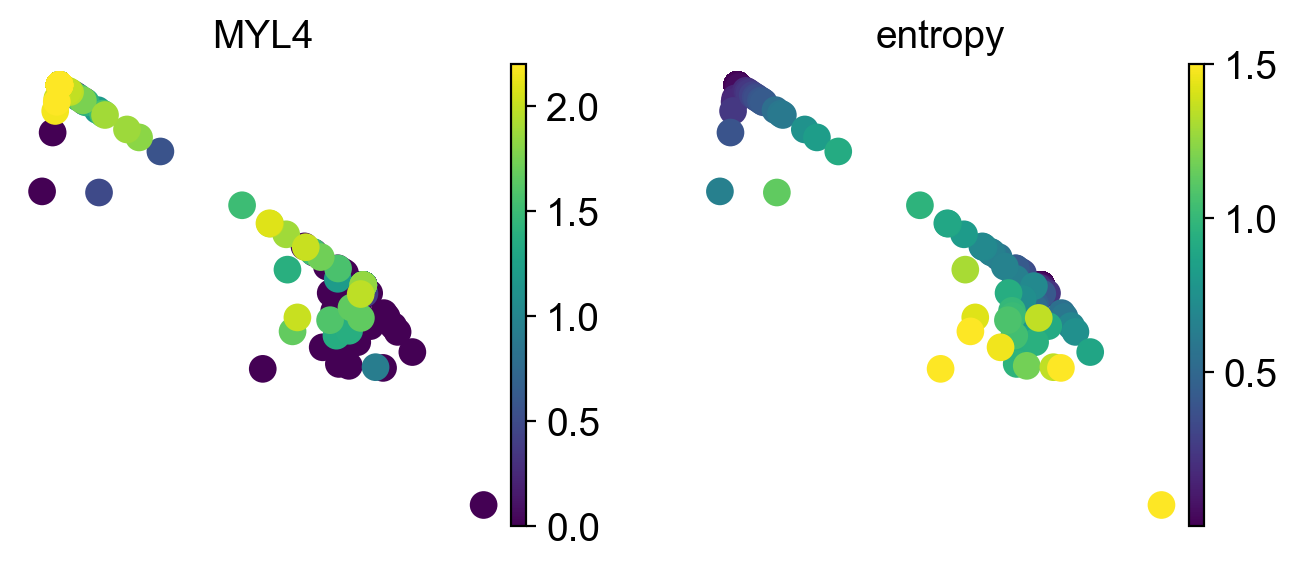

In [23]:
sc.pl.embedding(adata_sub, color=['MYL4','entropy'],vmin = 'p20',vmax = 'p99',basis = 'trans_coord')

With the bifurcating state:

In [24]:
adata_ps = adata[adata.obs['attractor'].isin(['2']),:]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


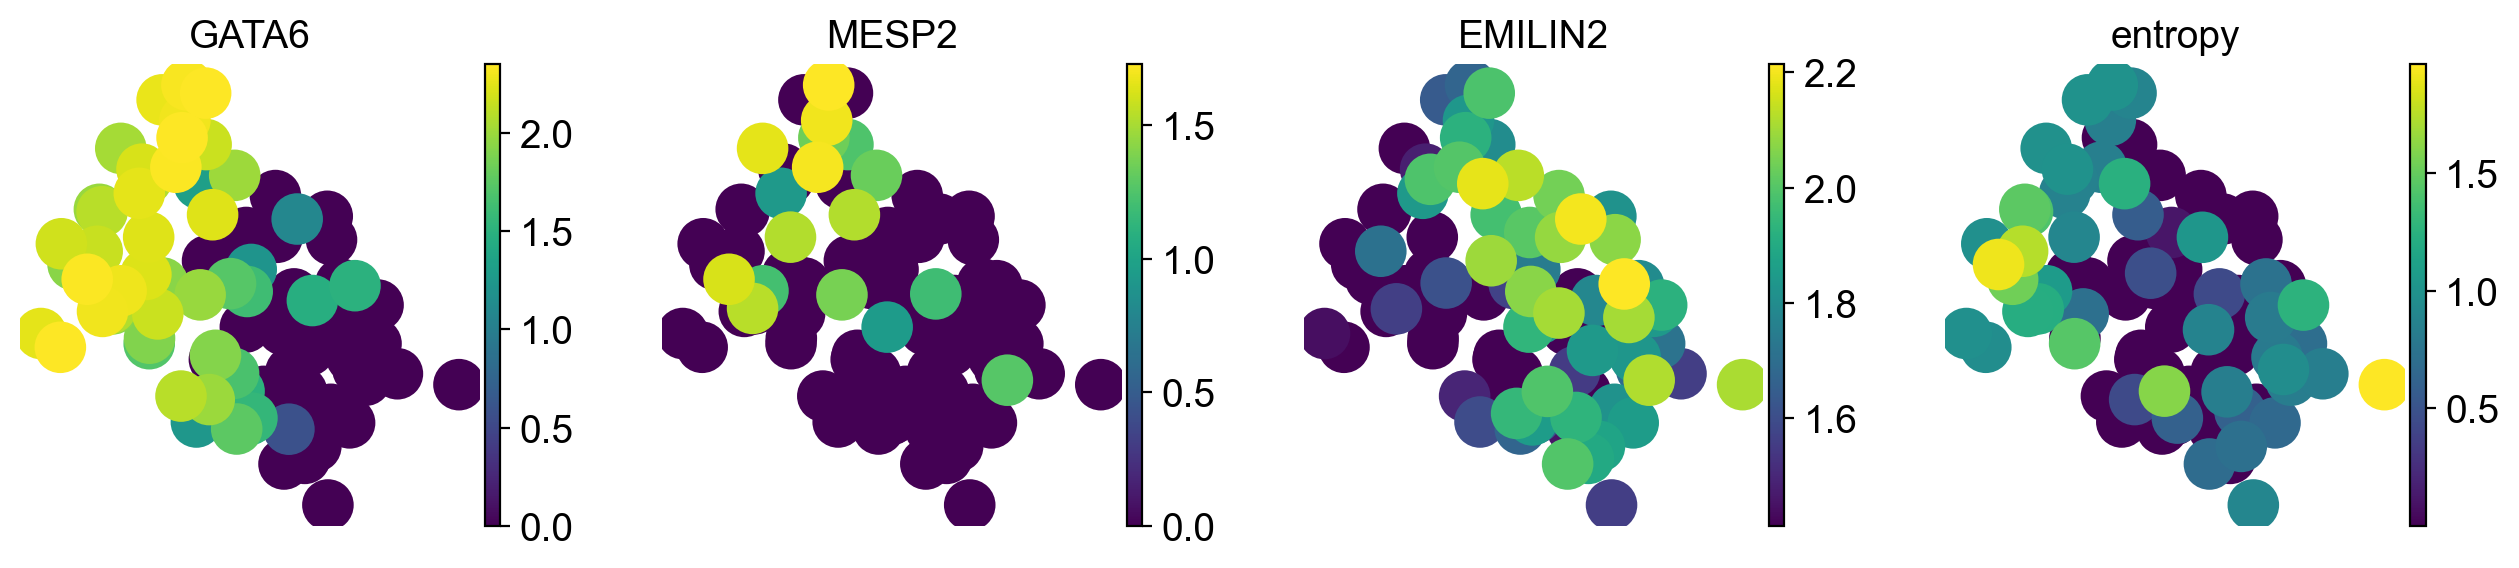

In [25]:
sc.pl.umap(adata_ps, color=['GATA6','MESP2','EMILIN2','entropy'],vmin = 'p30',vmax = 'p99')

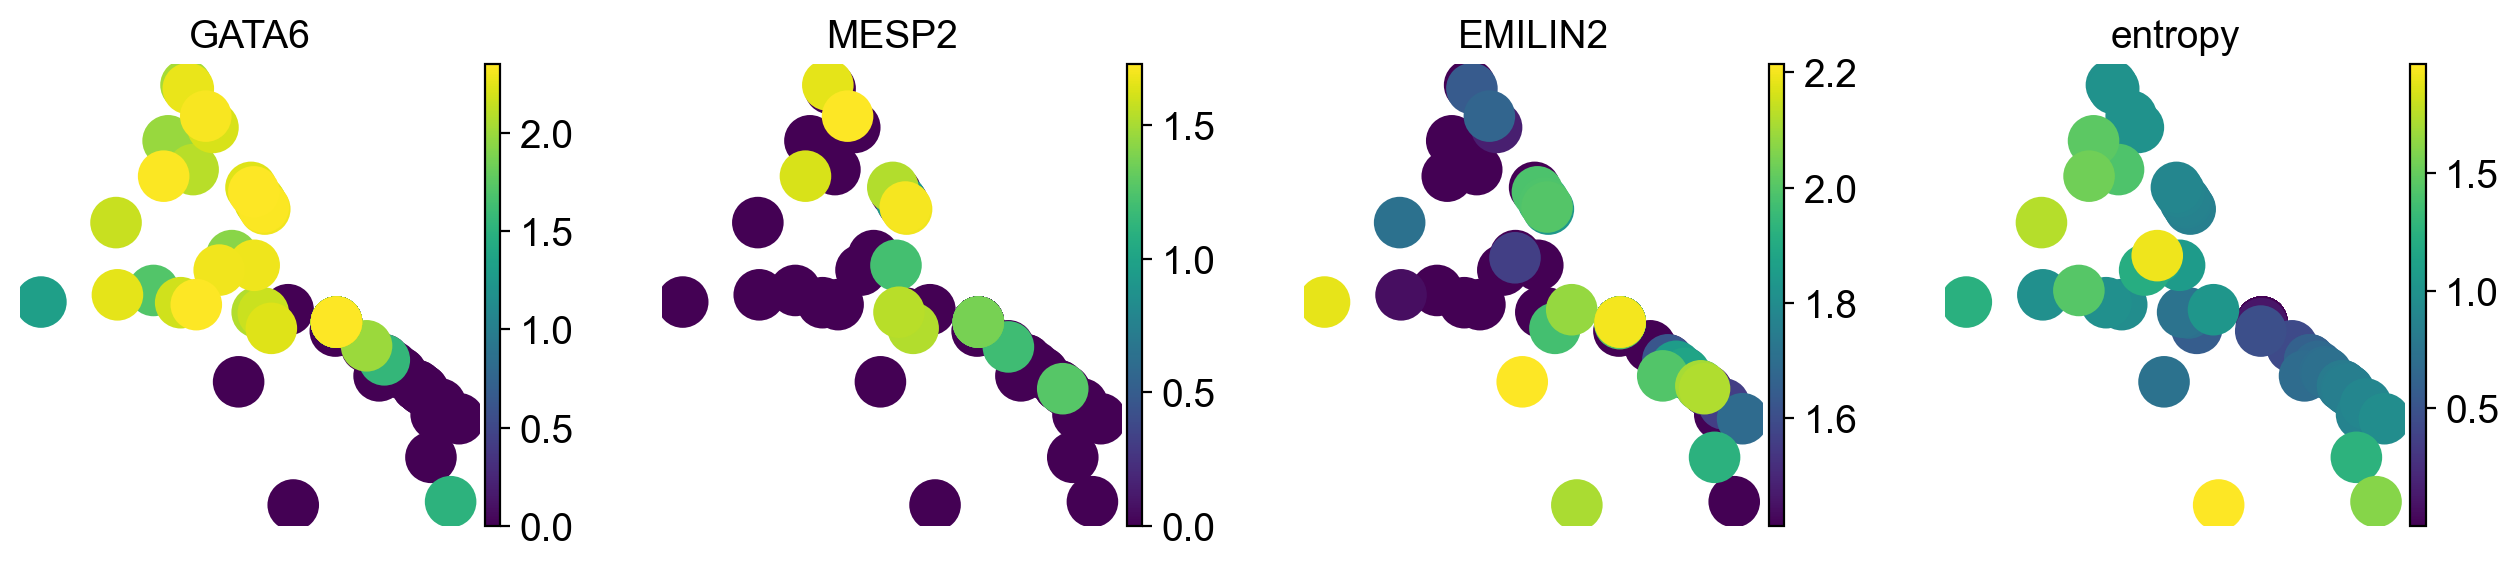

In [26]:
sc.pl.embedding(adata_ps, color=['GATA6','MESP2','EMILIN2','entropy'],vmin = 'p30',vmax = 'p99',basis = 'trans_coord')

## Changing the number of clusters K

In [27]:
par['K_cluster'] = 7.0
adata = pm.dynamical_analysis(adata,par)

... storing 'attractor' as categorical


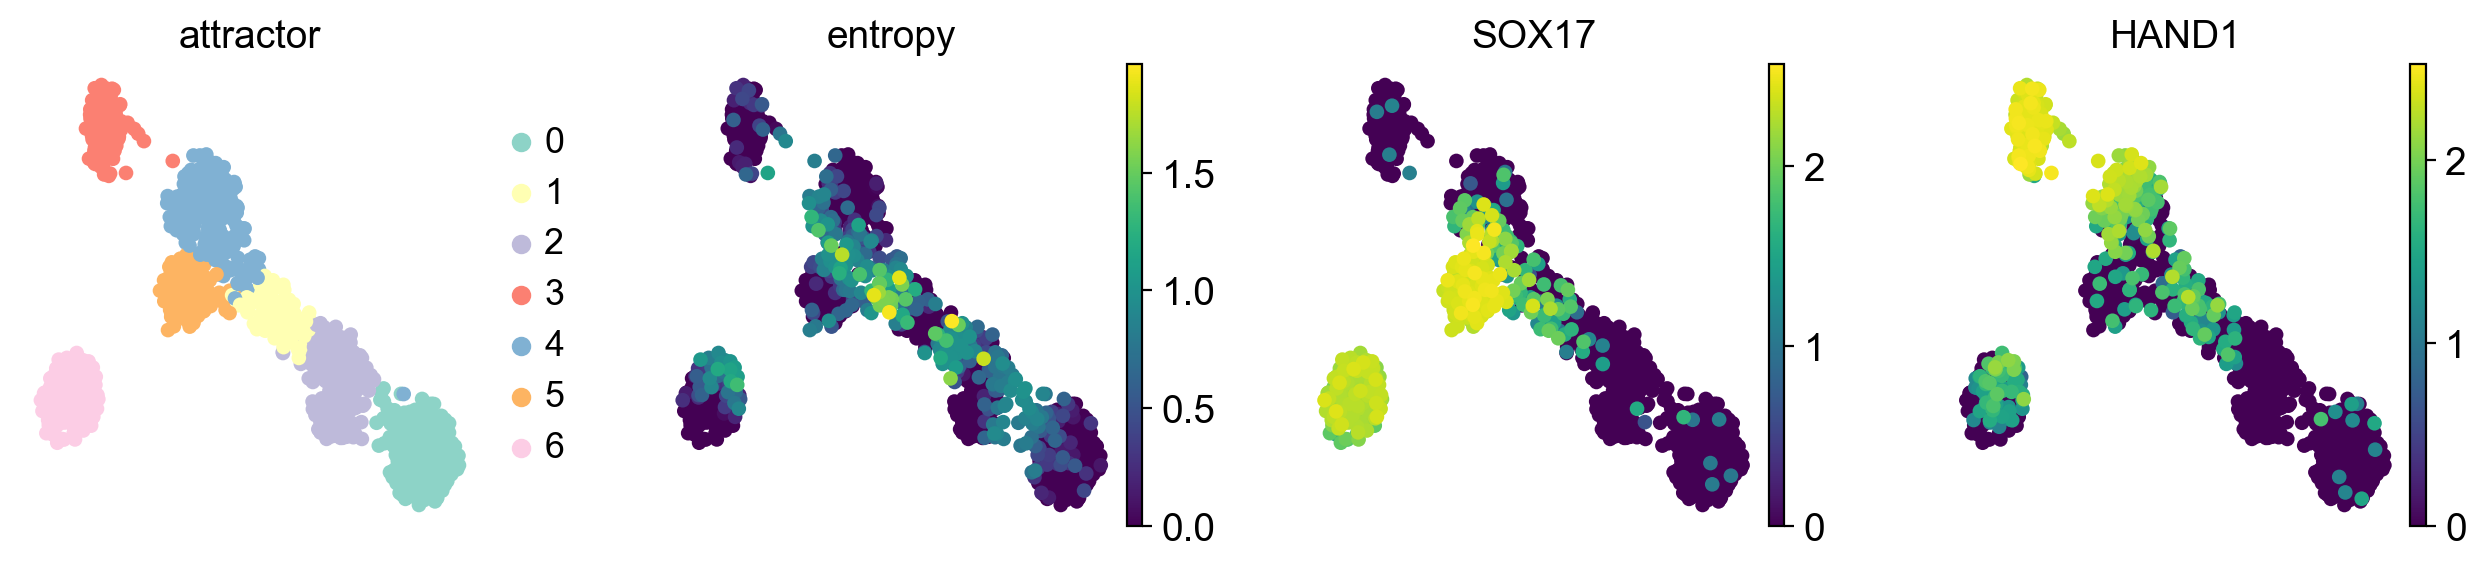

In [28]:
sc.pl.umap(adata, color=['attractor','entropy','SOX17','HAND1'],palette = color_palette)

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


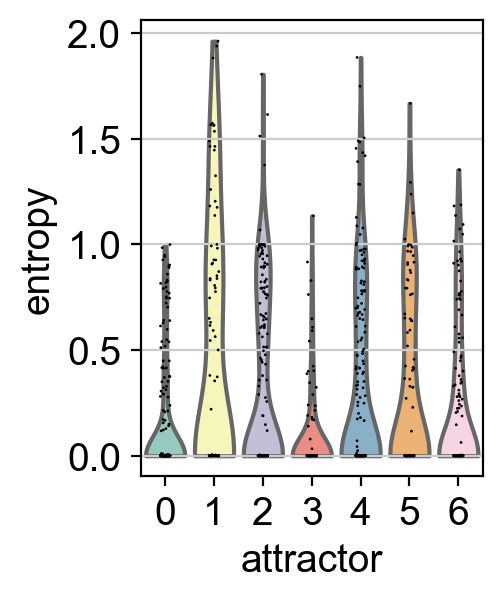

In [29]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

... storing 'time' as categorical
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


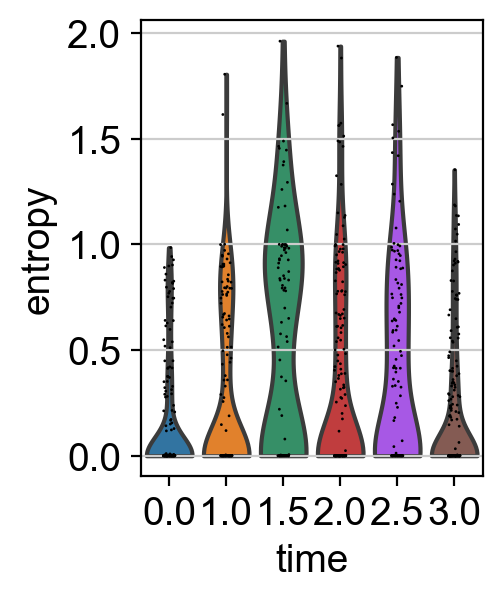

In [30]:
adata.obs['time'] = adata.obs['time'].astype(str)
sc.pl.violin(adata, keys = ['entropy'], groupby='time')

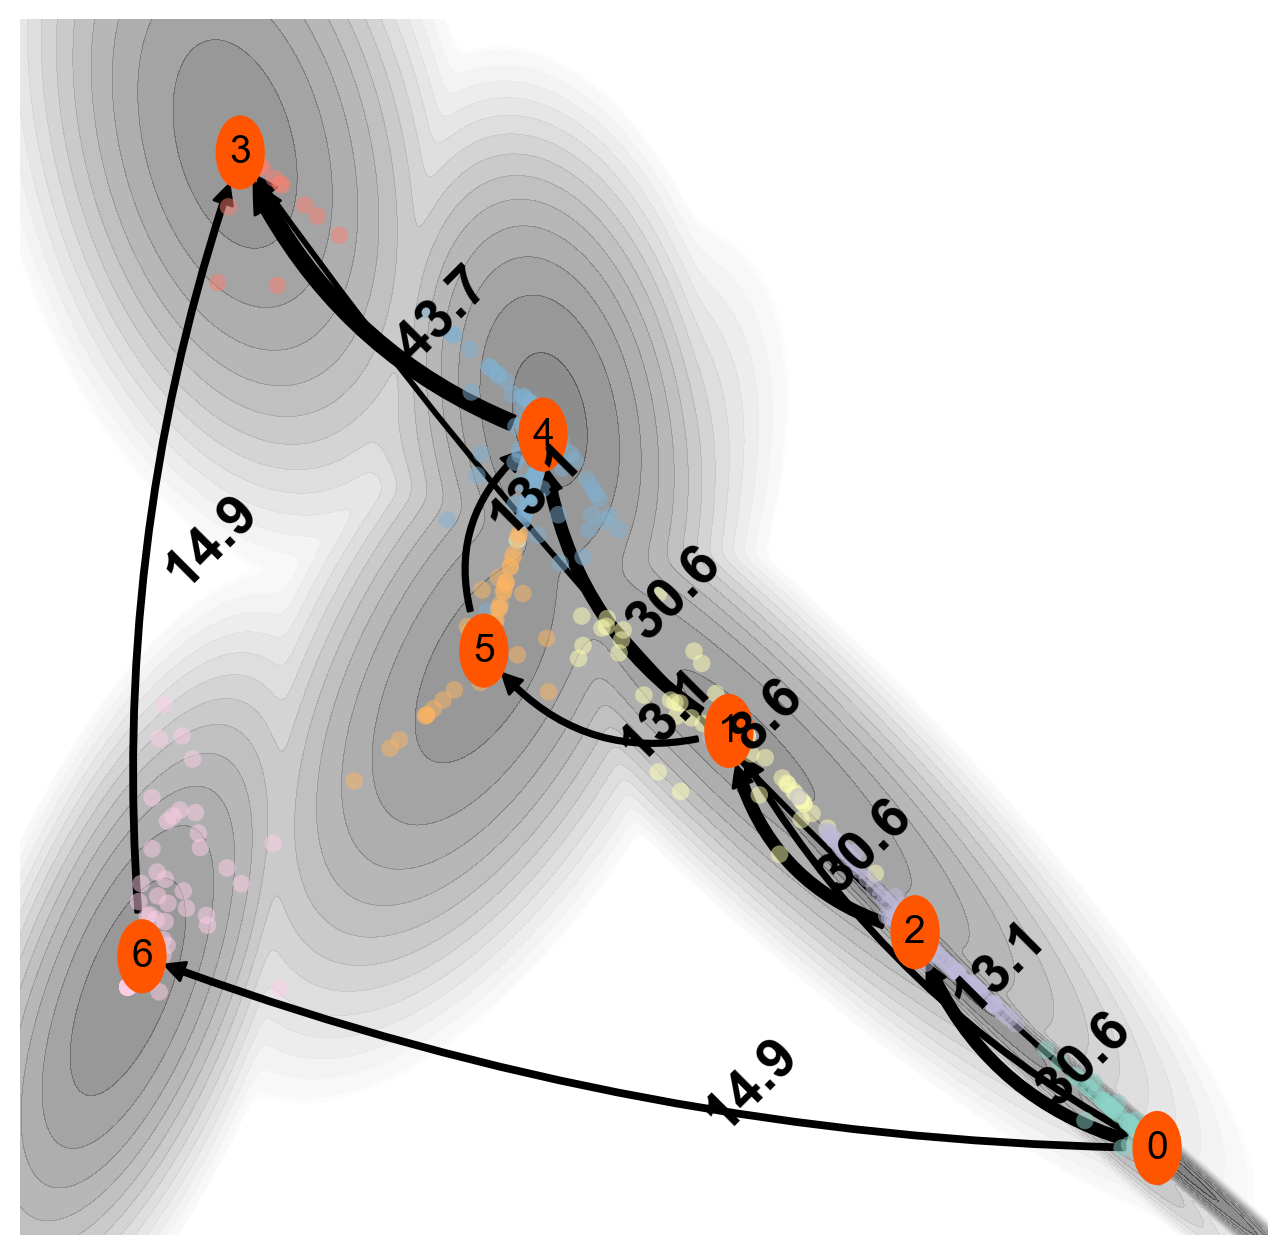

In [31]:
fig = plt.figure(figsize=(8, 8))
pm.infer_lineage(adata,si=0,sf=3,method = "MPPT",flux_fraction = 0.6,size_point =40,alpha_point = 0.5, color_palette =color_palette )

... storing 'attractor' as categorical


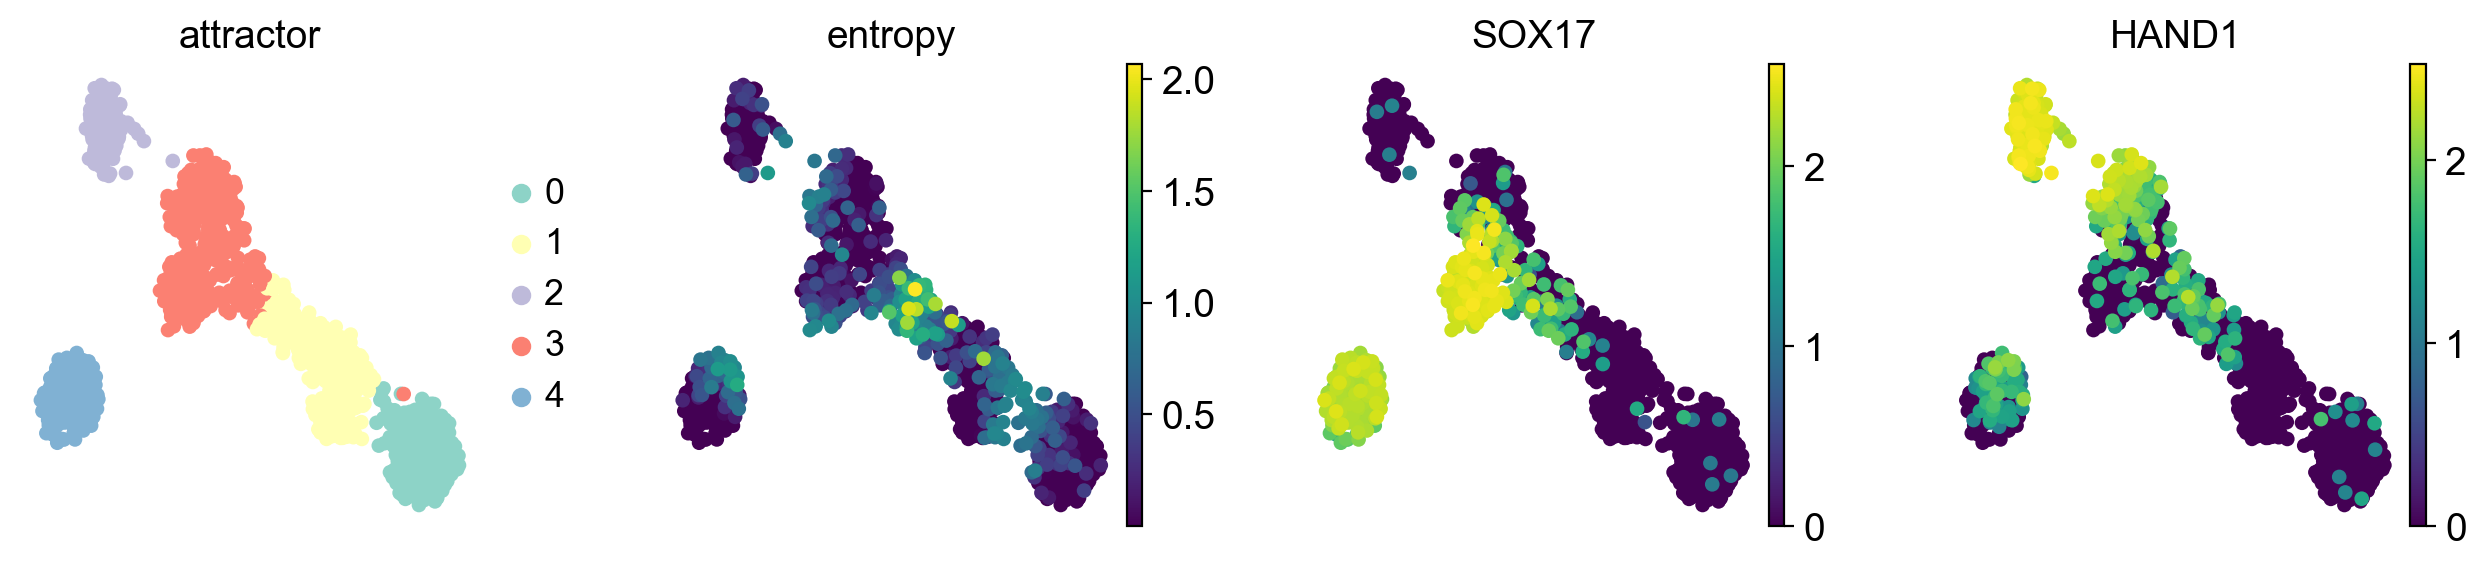

In [32]:
par['K_cluster'] = 5.0
adata = pm.dynamical_analysis(adata,par)
sc.pl.umap(adata, color=['attractor','entropy','SOX17','HAND1'])

... storing 'time' as categorical
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


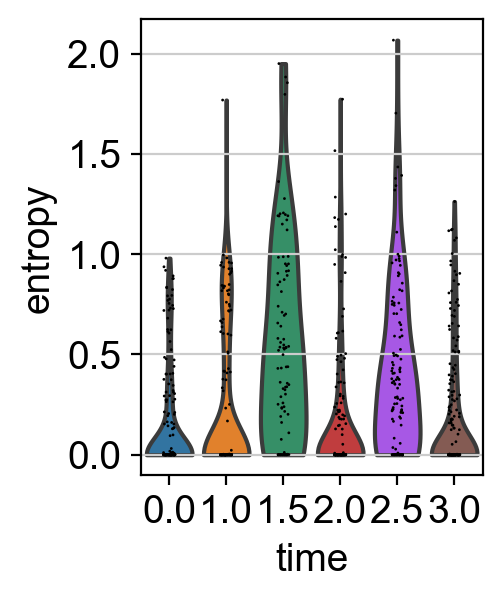

In [33]:
adata.obs['time'] = adata.obs['time'].astype(str)
sc.pl.violin(adata, keys = ['entropy'], groupby='time')

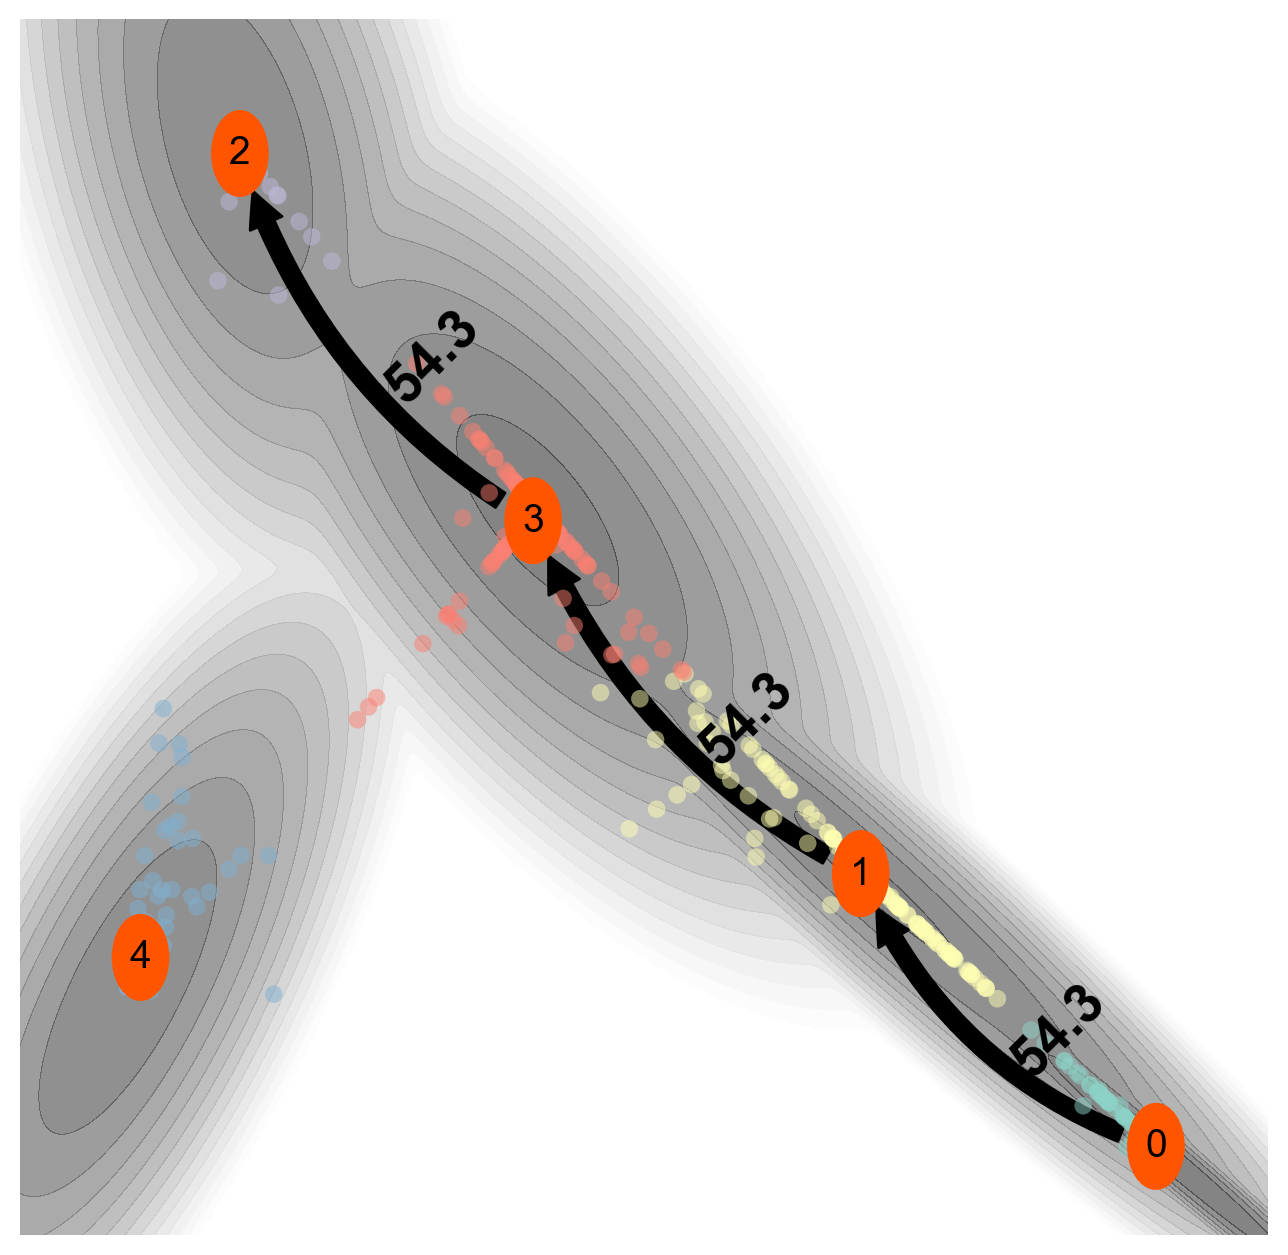

In [34]:
fig = plt.figure(figsize=(8, 8))
pm.infer_lineage(adata,si=0,sf=2,method = "MPPT",flux_fraction = 0.5,size_point =40,alpha_point = 0.5,color_palette =color_palette)